# Brain tumor classification *( 4 classes )*

## Load the modules

In [1]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Input, Dense, Conv2D, MaxPooling2D, Flatten, Dropout
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.optimizers import Adam
import matplotlib.pyplot as plt

## Load dataset

In [2]:
dataset_path = '/kaggle/input/brain-tumor-mri-data/brain-tumor-mri-dataset'

In [4]:
batch_size = 32
img_size = 300

train_datagen = ImageDataGenerator(rescale = 1/255,
                                   brightness_range = (0.8, 1.2),
                                   validation_split = 0.2
                                   )

test_datagen = ImageDataGenerator(rescale = 1/255, validation_split = 0.2)

train_data = train_datagen.flow_from_directory(dataset_path,
                                               target_size = (img_size, img_size),
                                               batch_size = batch_size,
                                               class_mode = 'categorical',
                                               color_mode = 'grayscale',
                                               subset = 'training'
                                           )

validation_data = test_datagen.flow_from_directory(dataset_path,
                                               target_size = (img_size, img_size),
                                               batch_size = batch_size,
                                               class_mode = 'categorical',
                                               color_mode = 'grayscale',
                                               subset = 'validation'
                                           )

Found 5723 images belonging to 4 classes.
Found 1430 images belonging to 4 classes.


In [5]:
class_dict = train_data.class_indices
class_dict

{'glioma': 0, 'meningioma': 1, 'notumor': 2, 'pituitary': 3}

## Let's see the images

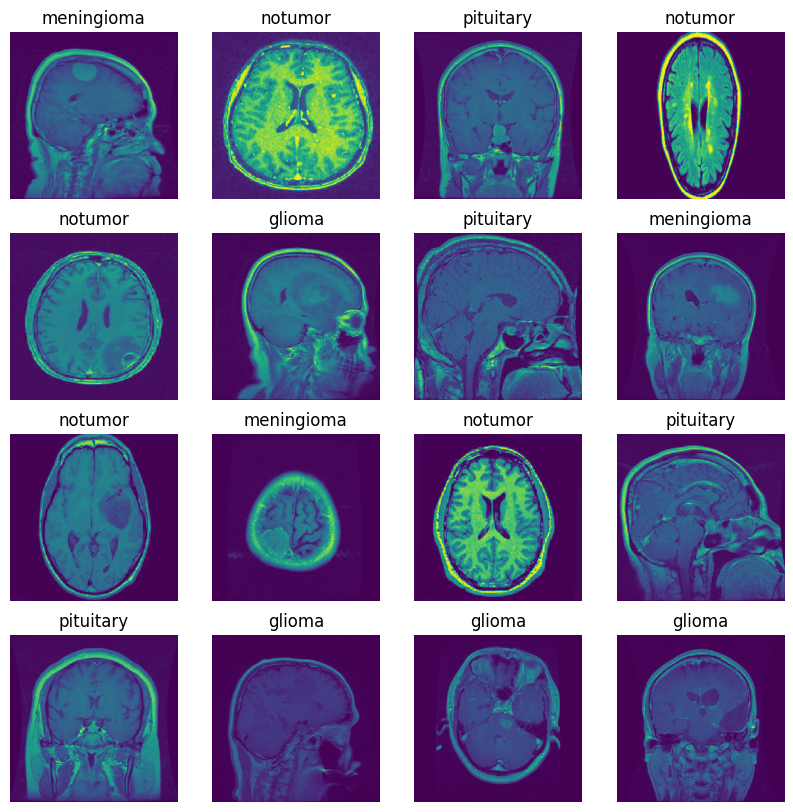

In [6]:
class_names = {v: k for k, v in class_dict.items()}
# print(class_names)
images, labels = next(validation_data)
# print(images.shape)

plt.figure(figsize = (10, 10))
for i in range(16):
    plt.subplot(4, 4, i+1)
    plt.axis('off')
    label_index = np.argmax(labels[i])
    class_name = class_names[label_index]
    plt.title(class_name)
    plt.imshow(images[i])
plt.show()

## Create a network

In [7]:
model = Sequential([
    Input(shape = (img_size, img_size, 1)),
    Conv2D(32, kernel_size = (3, 3), strides = 1, padding = 'same', activation = 'relu'),
    MaxPooling2D(pool_size = (2, 2), strides = 2, padding = 'valid'),
    
    Conv2D(64, kernel_size = (3, 3), strides = 1, padding = 'same', activation = 'relu'),
    MaxPooling2D(pool_size = (2, 2), strides = 2, padding = 'valid'),
    
    Conv2D(128, kernel_size = (3, 3), strides = 1, padding = 'same', activation = 'relu'),
    MaxPooling2D(pool_size = (2, 2), strides = 2, padding = 'valid'),
    
    Flatten(),
    Dense(128, activation = 'relu'),
    Dropout(0.5),

    Dense(4, activation = 'softmax')
])


In [8]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 300, 300, 32)   │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 150, 150, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 150, 150, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 75, 75, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 75, 75, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 37, 37, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 175232)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │    22,429,824 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 4)              │           516 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 22,523,012 (85.92 MB)

 Trainable params: 22,523,012 (85.92 MB)

 Non-trainable params: 0 (0.00 B)

## Compile the model

In [9]:
model.compile(optimizer = Adam(learning_rate = 0.001), loss = 'categorical_crossentropy', metrics = ['accuracy'])

## Train the model

In [10]:
history = model.fit(train_data,
                    epochs = 10,
                    validation_data = validation_data,
                    batch_size = batch_size
                   )

Epoch 1/10


/opt/conda/lib/python3.10/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()
I0000 00:00:1734522005.387884     144 service.cc:145] XLA service 0x7bf6080050a0 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1734522005.387939     144 service.cc:153]   StreamExecutor device (0): Tesla P100-PCIE-16GB, Compute Capability 6.0


  2/179 ━━━━━━━━━━━━━━━━━━━━ 10s 58ms/step - accuracy: 0.2422 - loss: 1.6846 

I0000 00:00:1734522014.290582     144 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


179/179 ━━━━━━━━━━━━━━━━━━━━ 65s 295ms/step - accuracy: 0.5922 - loss: 0.9758 - val_accuracy: 0.8441 - val_loss: 0.4120
Epoch 2/10
179/179 ━━━━━━━━━━━━━━━━━━━━ 19s 103ms/step - accuracy: 0.8422 - loss: 0.3937 - val_accuracy: 0.8825 - val_loss: 0.3349
Epoch 3/10
179/179 ━━━━━━━━━━━━━━━━━━━━ 20s 108ms/step - accuracy: 0.8913 - loss: 0.2652 - val_accuracy: 0.8895 - val_loss: 0.3105
Epoch 4/10
179/179 ━━━━━━━━━━━━━━━━━━━━ 20s 105ms/step - accuracy: 0.9198 - loss: 0.2058 - val_accuracy: 0.9217 - val_loss: 0.2469
Epoch 5/10
179/179 ━━━━━━━━━━━━━━━━━━━━ 19s 101ms/step - accuracy: 0.9470 - loss: 0.1350 - val_accuracy: 0.9196 - val_loss: 0.2997
Epoch 6/10
179/179 ━━━━━━━━━━━━━━━━━━━━ 20s 108ms/step - accuracy: 0.9664 - loss: 0.0993 - val_accuracy: 0.9322 - val_loss: 0.2844
Epoch 7/10
179/179 ━━━━━━━━━━━━━━━━━━━━ 19s 104ms/step - accuracy: 0.9678 - loss: 0.0809 - val_accuracy: 0.9392 - val_loss: 0.2483
Epoch 8/10
179/179 ━━━━━━━━━━━━━━━━━━━━ 19s 101ms/step - accuracy: 0.9765 - loss: 0.0671 - val

## Save the model

In [11]:
model.save('brain-tumor-model.h5')

## Plot the performance

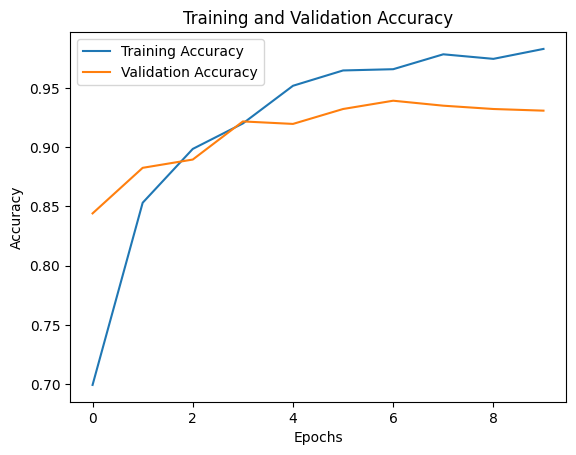

In [12]:
plt.plot(history.history['accuracy'], label = 'Training Accuracy')
plt.plot(history.history['val_accuracy'], label = 'Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

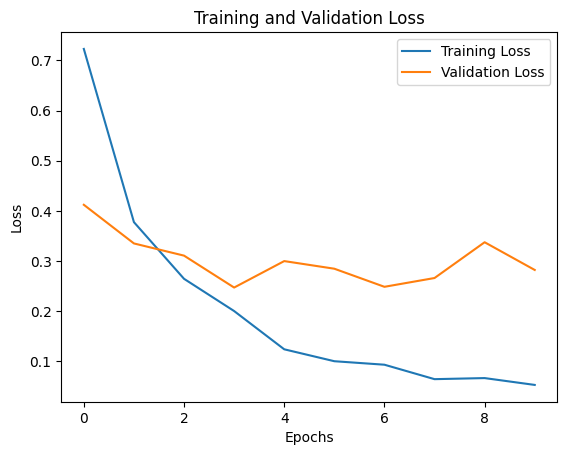

In [13]:
plt.plot(history.history['loss'], label = 'Training Loss')
plt.plot(history.history['val_loss'], label = 'Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

## Evaluate the model

In [14]:
loss, accuracy = model.evaluate(validation_data)

print(f"Test Loss: {loss}")
print(f"Test Accuracy: {accuracy}")

45/45 ━━━━━━━━━━━━━━━━━━━━ 4s 77ms/step - accuracy: 0.9356 - loss: 0.2428
Test Loss: 0.28195473551750183
Test Accuracy: 0.9307692050933838
